In [1]:
# import yfinance library
import yfinance as yf

In [2]:
# import other important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime as dt
%matplotlib inline

## Queriyng the assets into a big table

In [3]:
# get the data
tesla = yf.Ticker('TSLA')
nio = yf.Ticker('NIO')
clean_energy_etf = yf.Ticker('IQQH.F')
bitcoin = yf.Ticker('BTC-USD')
ethereum = yf.Ticker('ETH-USD')
litecoin = yf.Ticker('LTC-USD')
amazon = yf.Ticker('AMZN')
twitter = yf.Ticker('TWTR')
facebook = yf.Ticker('FB')
square = yf.Ticker('SQ')
paypal = yf.Ticker('PYPL')
berkshire_hathaway = yf.Ticker('BRK-A')
s_and_p = yf.Ticker('^GSPC')
gold = yf.Ticker('GC=F')
silver = yf.Ticker('SI=F')
crude_oil = yf.Ticker('CL=F')
under_armour = yf.Ticker('UA')
gartner = yf.Ticker('IT')


In [4]:
assets = ['TSLA', 'NIO', 'IQQH.F', 'BTC-USD', 'ETH-USD', 'LTC-USD', 'AMZN', 'TWTR', 'FB', 'SQ', 'PYPL', 'BRK-A','^GSPC',
           'GC=F', 'SI=F', 'CL=F', 'UA', 'IT']

# create an "empty" (fill only todays date) dataframe that I will use to add more columns with a for loop
base = dt.date.today()
date_list = [base - dt.timedelta(days=x) for x in range(1)]
#date_list = [base]
date_list.sort()
financial_assets = pd.DataFrame(index = date_list)


# pull the assets then merge them 

for i in assets:
    i = yf.Ticker(i)
    i = i.history(period="max")
    i = i[['Open']]
    financial_assets = financial_assets.merge(i, how = 'outer', left_index = True, right_index = True)
    
financial_assets.columns = assets

In [5]:
financial_assets.tail(10)

,TSLA,NIO,IQQH.F,BTC-USD,ETH-USD,LTC-USD,AMZN,TWTR,FB,SQ,PYPL,BRK-A,^GSPC,GC=F,SI=F,CL=F,UA,IT
2021-08-09,710.169983,43.700001,11.162,43791.925781,3012.885742,149.818512,3343.610107,67.500000,363.760010,272.989990,280.220001,433056.0,4437.770020,1753.500000,23.254999,67.879997,21.049999,292.000000
2021-08-10,713.989990,45.470001,11.346,46280.847656,3163.050049,166.467728,3345.010010,67.199997,361.829987,280.010010,278.940002,432690.0,4435.790039,1728.599976,23.485001,66.849998,21.309999,289.480011
2021-08-11,712.710022,44.709999,11.360,45599.703125,3142.830322,165.408691,3331.449951,65.790001,362.100006,277.760010,277.441986,434655.0,4442.180176,1727.300049,23.474001,68.510002,21.610001,292.089996
2021-08-12,706.340027,44.349998,11.184,45576.878906,3164.175781,170.879288,3290.000000,64.809998,358.450012,270.450012,274.250000,439121.0,4446.080078,1749.699951,23.105000,69.360001,21.870001,294.760010
2021-08-13,723.710022,41.900002,11.102,44439.691406,3049.001221,165.511780,3305.669922,64.989998,362.970001,269.950012,276.170013,437935.0,4464.839844,1758.300049,23.350000,68.910004,21.820000,301.739990
2021-08-14,NaN,NaN,NaN,47810.687500,3322.762695,183.382401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-15,NaN,NaN,NaN,47096.667969,3266.276123,182.938919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-16,705.070007,39.459999,NaN,47019.960938,3309.422119,184.776001,3283.000000,64.339996,362.519989,266.350006,273.730011,432443.0,4461.649902,1776.900024,23.780001,68.129997,21.370001,304.239990
2021-08-17,672.659973,37.459999,NaN,45936.457031,3149.380371,178.152649,3277.500000,63.340000,362.980011,260.980011,275.250000,434530.0,4462.120117,1787.699951,23.648001,67.430000,20.930000,307.660004
2021-08-18,NaN,NaN,10.876,44919.644531,3033.801270,169.811386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1787.800049,23.660000,66.580002,NaN,NaN


In [6]:
# filtering weekend's datas out according TSLA NaN's.
financial_assets[financial_assets['TSLA'].notna()].tail(15)

,TSLA,NIO,IQQH.F,BTC-USD,ETH-USD,LTC-USD,AMZN,TWTR,FB,SQ,PYPL,BRK-A,^GSPC,GC=F,SI=F,CL=F,UA,IT
2021-07-28,647.000000,40.910000,10.722,39503.187500,2302.081299,134.767212,3633.780029,68.389999,374.559998,254.029999,300.739990,422250.0,4402.950195,1799.500000,24.735001,71.900002,17.680000,265.059998
2021-07-29,649.789978,42.250000,11.022,39995.453125,2299.011963,140.299164,3627.750000,69.500000,361.000000,255.509995,285.369995,419635.0,4403.589844,1806.599976,25.040001,72.400002,17.510000,262.970001
2021-07-30,671.760010,42.230000,10.938,40027.484375,2382.545166,141.471710,3347.949951,69.830002,354.000000,249.279999,280.244995,421770.0,4395.120117,1828.000000,25.545000,73.410004,17.400000,262.630005
2021-08-02,700.000000,44.650002,11.088,39907.261719,2557.774658,140.542435,3353.100098,70.230003,358.100006,247.929993,276.885010,420985.0,4406.859863,1812.400024,25.450001,73.910004,18.070000,265.970001
2021-08-03,719.000000,45.230000,10.982,39178.402344,2609.413086,141.468506,3340.719971,69.870003,352.730011,270.429993,272.059998,420576.0,4392.740234,1812.300049,25.389999,71.519997,19.000000,271.880005
2021-08-04,711.000000,45.470001,11.156,38213.332031,2508.544922,138.486313,3379.350098,68.680000,352.420013,268.000000,274.071014,421988.0,4415.950195,1809.300049,25.610001,70.320000,19.559999,295.279999
2021-08-05,716.000000,44.750000,11.198,39744.515625,2725.669678,142.627914,3356.219971,68.849998,359.640015,265.600006,277.100006,421358.0,4408.859863,1810.800049,25.520000,68.059998,20.510000,291.779999
2021-08-06,711.900024,45.549999,11.138,40865.867188,2827.503418,143.548004,3375.000000,69.300003,361.399994,279.510010,280.000000,424426.0,4429.069824,1799.800049,24.490000,69.139999,21.309999,296.959991
2021-08-09,710.169983,43.700001,11.162,43791.925781,3012.885742,149.818512,3343.610107,67.500000,363.760010,272.989990,280.220001,433056.0,4437.770020,1753.500000,23.254999,67.879997,21.049999,292.000000
2021-08-10,713.989990,45.470001,11.346,46280.847656,3163.050049,166.467728,3345.010010,67.199997,361.829987,280.010010,278.940002,432690.0,4435.790039,1728.599976,23.485001,66.849998,21.309999,289.480011


In [7]:
financial_assets = financial_assets[financial_assets['TSLA'].notna()]

## Normalization (or standardization)

In [8]:
# I will test 4 different normalization method

# import the nessesary libraries
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

<AxesSubplot:>

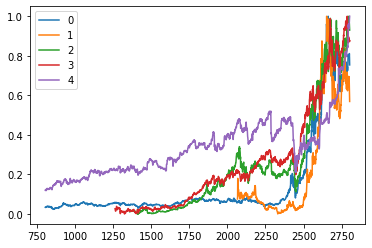

In [9]:
# 1.The min-max scaler method

scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(financial_assets[['TSLA', 'NIO', 'SQ', 'PYPL', 'IT']])).tail(2000).plot()

<AxesSubplot:>

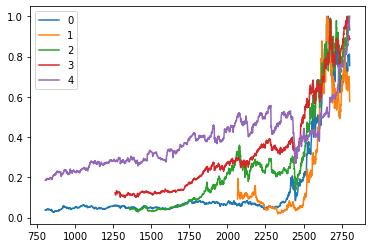

In [10]:
# 2.The max-abs scaler method

scaler = MaxAbsScaler()
pd.DataFrame(scaler.fit_transform(financial_assets[['TSLA', 'NIO', 'SQ', 'PYPL', 'IT']])).tail(2000).plot()

<AxesSubplot:>

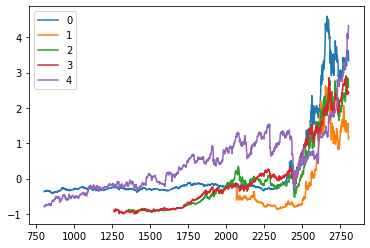

In [11]:
# 3.The z-score method

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(financial_assets[['TSLA', 'NIO', 'SQ', 'PYPL', 'IT']])).tail(2000).plot()

<AxesSubplot:>

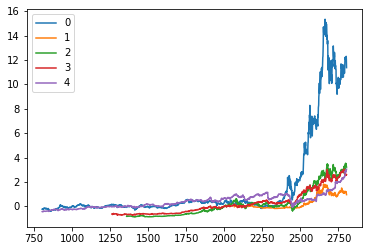

In [12]:
# 4.The robust_scaler method

scaler = RobustScaler()
pd.DataFrame(scaler.fit_transform(financial_assets[['TSLA', 'NIO', 'SQ', 'PYPL', 'IT']])).tail(2000).plot()

### The winner method is the min-max scaler, so I'll use it.

In [13]:
scaler = MinMaxScaler()
financial_assets = pd.DataFrame(scaler.fit_transform(financial_assets), columns=financial_assets.columns)

## Correlation calculations

In [14]:
# our big table after normalization
financial_assets.tail(2000)

,TSLA,NIO,IQQH.F,BTC-USD,ETH-USD,LTC-USD,AMZN,TWTR,FB,SQ,PYPL,BRK-A,^GSPC,GC=F,SI=F,CL=F,UA,IT
804,0.033098,NaN,0.097923,NaN,NaN,NaN,0.052580,NaN,0.073721,NaN,NaN,0.199400,0.183057,0.338879,0.327837,0.971773,NaN,0.119124
805,0.032722,NaN,0.100890,NaN,NaN,NaN,0.053495,NaN,0.073384,NaN,NaN,0.204812,0.188369,0.326477,0.319593,0.961138,NaN,0.122816
806,0.033839,NaN,0.103116,NaN,NaN,NaN,0.053045,NaN,0.071000,NaN,NaN,0.206730,0.190094,0.314680,0.294037,0.948941,NaN,0.122956
807,0.033296,NaN,0.103116,NaN,NaN,NaN,0.053177,NaN,0.077003,NaN,NaN,0.207170,0.192471,0.308832,0.303792,0.952146,NaN,0.122570
808,0.033019,NaN,NaN,NaN,NaN,NaN,0.053383,NaN,0.075628,NaN,NaN,0.205264,0.191258,0.271426,0.275488,0.958949,NaN,0.121585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,0.798830,0.682560,0.636498,0.717049,0.752814,0.424744,0.886602,0.804844,0.965047,0.991720,0.884457,0.981212,0.993408,0.679169,0.313383,0.645164,0.379006,0.945255
2800,0.791657,0.676913,0.623442,0.716689,0.757928,0.438891,0.875209,0.789629,0.954808,0.964819,0.873010,0.994306,0.994542,0.701754,0.303243,0.651810,0.385620,0.954643
2801,0.811215,0.638488,0.617359,0.698737,0.730336,0.425011,0.879516,0.792423,0.967488,0.962979,0.879895,0.990829,1.000000,0.710426,0.309975,0.648292,0.384348,0.979185
2802,0.790227,0.600220,NaN,0.739469,0.792724,0.474826,0.873284,0.782332,0.966225,0.949731,0.871145,0.974727,0.999072,0.729179,0.321792,0.642192,0.372902,0.987975


In [15]:
# there are four basic method, that we can use   

In [16]:
# 1. method: pearson (the standard one)
financial_assets.corr(method = 'pearson')

,TSLA,NIO,IQQH.F,BTC-USD,ETH-USD,LTC-USD,AMZN,TWTR,FB,SQ,PYPL,BRK-A,^GSPC,GC=F,SI=F,CL=F,UA,IT
TSLA,1.000000,0.960405,0.870226,0.888145,0.790977,0.574494,0.816362,0.597563,0.762821,0.944905,0.922246,0.667641,0.771469,0.549401,0.080429,-0.277995,-0.251918,0.681653
NIO,0.960405,1.000000,0.951105,0.815661,0.755542,0.657517,0.837451,0.834142,0.805105,0.953238,0.903683,0.715606,0.853247,0.641810,0.844481,0.236208,0.043266,0.597616
IQQH.F,0.870226,0.951105,1.000000,0.826819,0.710303,0.502727,0.665950,0.639913,0.759819,0.927721,0.901539,0.498253,0.597908,0.434262,0.142024,-0.222545,-0.239321,0.499150
BTC-USD,0.888145,0.815661,0.826819,1.000000,0.908782,0.801525,0.777701,0.722813,0.813228,0.886562,0.876636,0.807737,0.862114,0.700460,0.761640,0.266642,-0.231163,0.785850
ETH-USD,0.790977,0.755542,0.710303,0.908782,1.000000,0.808582,0.663025,0.750720,0.780041,0.784880,0.780437,0.770192,0.786524,0.563972,0.697968,0.469663,-0.175710,0.801551
LTC-USD,0.574494,0.657517,0.502727,0.801525,0.808582,1.000000,0.632365,0.503461,0.698085,0.605592,0.627634,0.768706,0.719696,0.489563,0.476979,0.384688,-0.322250,0.696024
AMZN,0.816362,0.837451,0.665950,0.777701,0.663025,0.632365,1.000000,0.418926,0.949783,0.939896,0.961177,0.893193,0.946043,0.460012,-0.202316,-0.523246,-0.523335,0.878157
TWTR,0.597563,0.834142,0.639913,0.722813,0.750720,0.503461,0.418926,1.000000,0.328785,0.922033,0.896882,0.356153,0.456862,0.474712,0.606005,0.483086,-0.305514,0.363774
FB,0.762821,0.805105,0.759819,0.813228,0.780041,0.698085,0.949783,0.328785,1.000000,0.927239,0.953995,0.944177,0.978521,0.470322,-0.077735,-0.527522,-0.473924,0.927018
SQ,0.944905,0.953238,0.927721,0.886562,0.784880,0.605592,0.939896,0.922033,0.927239,1.000000,0.981303,0.845007,0.947664,0.823189,0.816485,0.289104,-0.349308,0.805023


In [17]:
# 2. method: spearman 
financial_assets.corr(method = 'spearman')

,TSLA,NIO,IQQH.F,BTC-USD,ETH-USD,LTC-USD,AMZN,TWTR,FB,SQ,PYPL,BRK-A,^GSPC,GC=F,SI=F,CL=F,UA,IT
TSLA,1.000000,0.792515,0.335175,0.746993,0.742636,0.654270,0.916769,0.180412,0.880245,0.758608,0.759211,0.907644,0.925952,0.041219,-0.459150,-0.579991,-0.584438,0.898592
NIO,0.792515,1.000000,0.653509,0.579268,0.691032,0.419407,0.689019,0.644089,0.633595,0.870185,0.665678,0.555339,0.640106,0.561387,0.633208,0.175234,-0.048963,0.381104
IQQH.F,0.335175,0.653509,1.000000,0.378486,0.332793,0.201612,0.337304,0.550939,0.655782,0.656639,0.668145,0.360429,0.376226,0.146142,-0.001630,-0.295289,-0.261013,0.301016
BTC-USD,0.746993,0.579268,0.378486,1.000000,0.885843,0.912556,0.922744,0.421317,0.951447,0.846119,0.908133,0.886262,0.929950,0.824966,0.473589,0.272131,-0.539129,0.847529
ETH-USD,0.742636,0.691032,0.332793,0.885843,1.000000,0.914361,0.755569,0.647335,0.843551,0.711968,0.744124,0.759399,0.774836,0.638648,0.449602,0.532928,-0.474272,0.709362
LTC-USD,0.654270,0.419407,0.201612,0.912556,0.914361,1.000000,0.803884,0.385739,0.850048,0.691675,0.749669,0.834934,0.824756,0.667070,0.305016,0.482881,-0.337324,0.838657
AMZN,0.916769,0.689019,0.337304,0.922744,0.755569,0.803884,1.000000,0.170551,0.971845,0.958790,0.976787,0.955050,0.981535,0.085616,-0.482814,-0.627212,-0.459381,0.965121
TWTR,0.180412,0.644089,0.550939,0.421317,0.647335,0.385739,0.170551,1.000000,0.147047,0.877666,0.818984,0.226906,0.229922,0.349367,0.432934,0.510277,-0.226588,0.132441
FB,0.880245,0.633595,0.655782,0.951447,0.843551,0.850048,0.971845,0.147047,1.000000,0.876189,0.939539,0.940914,0.976865,0.316686,-0.188246,-0.473395,-0.493139,0.941744
SQ,0.758608,0.870185,0.656639,0.846119,0.711968,0.691675,0.958790,0.877666,0.876189,1.000000,0.955081,0.886009,0.948939,0.670913,0.334619,0.382105,-0.378430,0.851348


In [18]:
# 3. method: kendall 
financial_assets.corr(method = 'kendall')

,TSLA,NIO,IQQH.F,BTC-USD,ETH-USD,LTC-USD,AMZN,TWTR,FB,SQ,PYPL,BRK-A,^GSPC,GC=F,SI=F,CL=F,UA,IT
TSLA,1.000000,0.617752,0.261596,0.555528,0.542056,0.463902,0.755528,0.127211,0.709674,0.587620,0.577521,0.730478,0.775529,0.015244,-0.310748,-0.345144,-0.394443,0.733214
NIO,0.617752,1.000000,0.470752,0.356149,0.466969,0.246227,0.478123,0.440323,0.417097,0.685660,0.473833,0.355786,0.427424,0.310202,0.398834,0.124291,-0.019473,0.228003
IQQH.F,0.261596,0.470752,1.000000,0.244521,0.247298,0.122612,0.250650,0.398527,0.486118,0.485601,0.474756,0.269072,0.300366,0.092652,0.007239,-0.184248,-0.160663,0.220266
BTC-USD,0.555528,0.356149,0.244521,1.000000,0.723661,0.752149,0.766121,0.321217,0.805487,0.669015,0.756894,0.700087,0.770877,0.612881,0.320419,0.203271,-0.374041,0.658856
ETH-USD,0.542056,0.466969,0.247298,0.723661,1.000000,0.752630,0.582362,0.456769,0.671456,0.527427,0.577032,0.575552,0.595359,0.463343,0.306255,0.378203,-0.309238,0.514018
LTC-USD,0.463902,0.246227,0.122612,0.752149,0.752630,1.000000,0.603956,0.274227,0.656259,0.493724,0.562342,0.622429,0.612332,0.459786,0.204157,0.323591,-0.211915,0.647778
AMZN,0.755528,0.478123,0.250650,0.766121,0.582362,0.603956,1.000000,0.166022,0.862361,0.831346,0.875974,0.812273,0.887143,0.061995,-0.339438,-0.356369,-0.306953,0.854005
TWTR,0.127211,0.440323,0.398527,0.321217,0.456769,0.274227,0.166022,1.000000,0.128934,0.686329,0.620399,0.176104,0.199169,0.234083,0.288141,0.336169,-0.135164,0.104660
FB,0.709674,0.417097,0.486118,0.805487,0.671456,0.656259,0.862361,0.128934,1.000000,0.715550,0.806588,0.789875,0.870320,0.218510,-0.136410,-0.266446,-0.343870,0.803283
SQ,0.587620,0.685660,0.485601,0.669015,0.527427,0.493724,0.831346,0.686329,0.715550,1.000000,0.838102,0.723763,0.819531,0.484943,0.190878,0.287637,-0.242949,0.668232


In [19]:
# 4. method: covariance: only good for normal distributed data => we can't use it in this task

<AxesSubplot:>

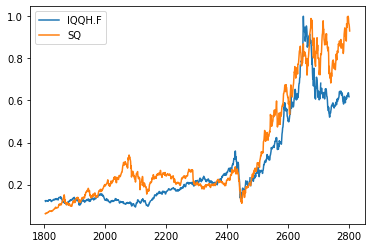

In [20]:
# example of highly corraleted assets by the pearson method
financial_assets[['IQQH.F', 'SQ']].tail(1000).plot()

<AxesSubplot:>

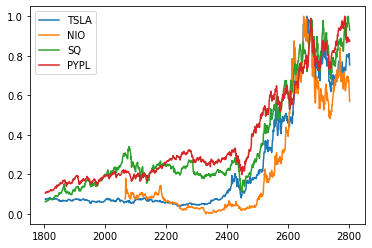

In [21]:
# example of highly corraleted assets by the spearman method
financial_assets[['TSLA','NIO', 'SQ', 'PYPL']].tail(1000).plot()

<AxesSubplot:>

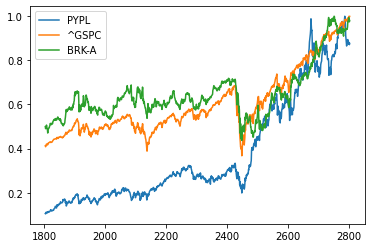

In [22]:
# example of highly corraleted assets by the kendall method
financial_assets[['PYPL', '^GSPC', 'BRK-A']].tail(1000).plot()

### The winner correlated  method is the searman.

In [23]:
# export to csv
financial_assets.corr(method = 'spearman').to_csv('financial_assets.csv')

### Highly correlated assets 

<AxesSubplot:>

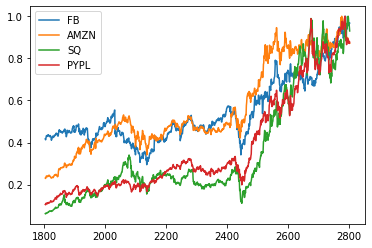

In [24]:
financial_assets[['FB', 'AMZN', 'SQ', 'PYPL']].tail(1000).plot()

<AxesSubplot:>

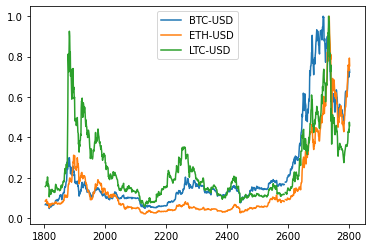

In [25]:
financial_assets[['BTC-USD', 'ETH-USD', 'LTC-USD']].tail(1000).plot()

### Not correlated assets

<AxesSubplot:>

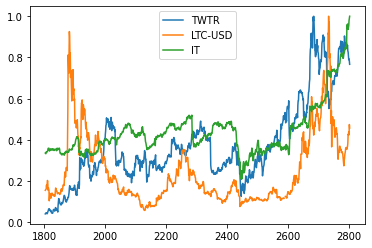

In [26]:
financial_assets[['TWTR', 'LTC-USD', 'IT']].tail(1000).plot()

<AxesSubplot:>

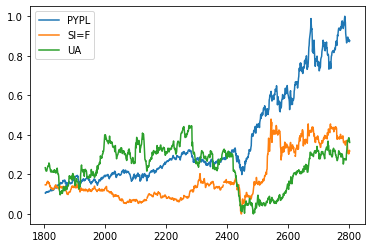

In [27]:
financial_assets[['PYPL', 'SI=F', 'UA']].tail(1000).plot()